In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv("ex1data1.txt",header=None) #Single Variable with output labels.
data2 = pd.read_csv("ex1data2.txt",header=None) #Same Code below will work for multiple variables with an output label.
#Reason being is that code below is fully Vectorized.
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [43]:
data.columns = ['Variable1','Output']
data2.columns = ['Area','Rooms','Price']
data.head()

,Variable1,Output
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


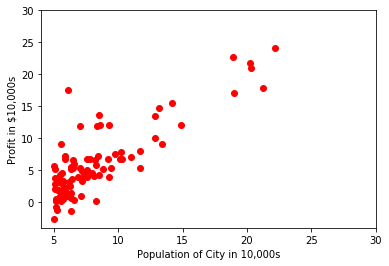

In [44]:
#Plot Paramenters : 
#1. List of X-Coordinates 
#2. List of Y-Coordinates 
#If only one list is given then its treated as Y-Coordinate - X - auto generated 0 onwards
#3. RED - Os in graph - ro, Blue Lines - b- etc.

#Coordinates are given as list here but usually plot works on numpy arrays. Internally lists get converted to numpy arrays.
#plt.plot(data['Variable1'].tolist(), data['Output'].tolist(), 'ro')

# Extracting Single Col returns a Pandas Series - data['Variable1'] - We convert it to a Numpy Array using values.
plt.plot(data['Variable1'].values, data['Output'].values, 'ro')

# Sample Multiple plots in same plotting area - 3 plots - red dashes, blue squares and green triangles
# plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')

plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.axis([4, 30, -4, 30]) # xmin,xmax,ymin,ymax 
plt.show()

In [45]:
X = np.ones(data['Variable1'].values.size)
X = X.reshape(X.size,1) #making X a 2D Array otherwise it was 1D

Y = data['Output'].values
Y = Y.reshape(Y.size,1)

# Inserting the col of values into X - Insert or Append could be used but both are not inplace.
# insert(arr, obj, values, axis=None) - Insert in arr, position where to insert, values, axis.
# position can be multiple : like - np.insert(x, (1,3), 999, axis=1)
# axis - 1 Column wise , axis - 0 Row wise, axis - None - Flatten the array.
# x = np.arange(8).reshape(2, 4)
# idx = (1, 3)
# np.insert(x, idx, 999, axis=1)
#array([[  0, 999,   1,   2, 999,   3],
#       [  4, 999,   5,   6, 999,   7]])
# x.flatten() - [  0, 999,   1,   2, 999,   3,  4, 999,   5,   6, 999,   7 ]


X = np.insert(X, 1, data['Variable1'].values, axis=1)

In [46]:
#Initializing Fitting Parameters
theta = np.zeros((X.shape[1], 1))

In [47]:
#Other parameters for gradient descent
iterations = 1500; #number of iterations for learning
alpha = 0.01;  #learning rate

In [48]:
#Compute the Cost - Fully Vectorized Code.
def computeCost(X, Y, theta):
    J = (1/(2*X.shape[0])) * (np.matmul((np.matmul(X,theta)-Y).transpose(),(np.matmul(X,theta)-Y)))
    return J
    

In [49]:
computeCost(X,Y,theta)

array([[32.07273388]])

In [50]:
#This contributes to the learning part. As we learn Parameter Vector Theta here.
def gradientDescent(X,Y,theta,alpha,iterations):
    for i in range(iterations):
        theta = theta - ((alpha/(X.shape[0])) * ((np.matmul((np.matmul(X,theta)-Y).transpose(),X))).transpose())
    return theta

In [51]:
theta = gradientDescent(X,Y,theta,alpha,iterations)

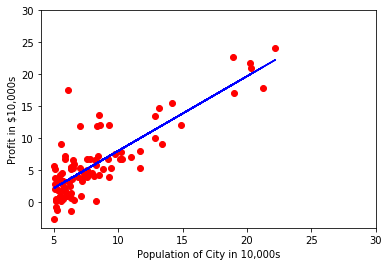

In [52]:
plt.plot(data['Variable1'].values, data['Output'].values, 'ro', X[:,1], np.matmul(X,theta), 'b-')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.axis([4, 30, -4, 30]) # xmin,xmax,ymin,ymax 
plt.show()